## Create a DataFrame for dataset "adult"
- data source: http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
- columns
  - education_num: the number of years of education in total
  - fnlwgt: final weight, which is the number of units in the target population that the responding unit represents
  - relationship: the responding unit’s role in the family
  - capital_gain & capital_loss: income from investment sources other than wage/salary

In [1]:
import pandas as pd
import numpy as np

column_name = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
               "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
               "hours-per-week", "native-country", "income-bracket"]
# sep: receiving regular expression to seperate;\s=空白字串;*=>=1個
adult_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                       sep='\s*,\s*', names=column_name, index_col=False, engine='python')

# To check the status of dataset
# # print the first 10 rows of  adult dataset
adult_df.head(10)
# # print all data of adlut dataset
# adult_df
# # To check dtype of each columns
# adult_df.info()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
# Cleaning data: drop 2399 rows

# finding the special characters in the data frame 
adult_df.isin(['?']).sum(axis=0)

# getting rid of incorrect data (to avoid incorrect analysis)
# replacing the special character to nan
adult_df['workclass'] = adult_df['workclass'].replace('?',np.nan)
adult_df['native-country'] = adult_df['native-country'].replace('?',np.nan)
adult_df['occupation'] = adult_df['occupation'].replace('?',np.nan)
# dropping the NaN rows now 
adult_df.dropna(how='any',inplace=True)
# to reset the index & using the drop parameter to avoid the old index being added as a column
adult_df.reset_index(drop=True, inplace=True)
adult_df.info()
adult_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income-bracket  30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Print the mean value of numerical columns

In [3]:
adult_df_num = adult_df.describe(include=['number'])
adult_df_num.loc['mean', :] = adult_df_num.loc['mean', :].map('{:,.2f}'.format)
pd.DataFrame(adult_df_num.loc['mean', :]).T

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
mean,38.44,"189,793.83",10.12,"1,092.01",88.37,40.93


## Print the mean of categorical columns
using mode & percentage

In [4]:
adult_df_cat = adult_df.describe(include=['object'])
adult_df_cat_mode = pd.DataFrame(adult_df_cat.loc['top', :]).T
adult_df_cat_perc = pd.DataFrame((adult_df_cat.loc['freq', :]/adult_df_cat.loc['count', :])*100).T
result = pd.concat([adult_df_cat_mode, adult_df_cat_perc], ignore_index=True)
result = result.rename(index={0: "mode", 1: "percentage"}).T
result['percentage'] = result['percentage'].map('{:,.2f}%'.format)
result.T

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income-bracket
mode,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
percentage,73.89%,32.62%,46.63%,13.39%,41.32%,85.98%,67.57%,91.19%,75.11%


## Convert data into one-hot-encoded by pandas.get_dummies()
pandas.get_dummies() official ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [5]:
cat_col = adult_df.describe(include=['object']).columns.tolist()
adult_df_one = pd.get_dummies(data=adult_df, columns=cat_col)
adult_df_one.reindex(sorted(adult_df_one.columns), axis=1)

,age,capital-gain,capital-loss,education-num,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,relationship_Wife,sex_Female,sex_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,2174,0,13,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,50,0,0,13,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,38,0,0,9,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,53,0,0,7,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,28,0,0,13,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,0,0,12,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
30158,40,0,0,9,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
30159,58,0,0,9,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
30160,22,0,0,9,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## PCA (Principle Component Analysis) 
1. feature encoding
2. seperate X(feature columns) & y(target column)
3. standardize
4. PCA
  - explained_variance_ & explained_variance_ratio_: PC1 & PC2解釋dataset的程度
  - component_: PC1 & PC2之於feature columns的標準化係數
  - 賦予PC1 & PC2意義
  - print the plot to show the relationship between y and PC1&PC2
  
### 備註
1. 使用one-hot-encoded資料: PCA結果的變異比例皆<10%
2. 使用僅類別型欄位LabelEncoder: PCA結果的變異比例比全部欄位LabelEncoder差
3. 刪除部分類別型欄位，PCA結果的變異比例有提高，嘗試僅使用數字型欄位做PCA分析

In [6]:
# feature encoding
from sklearn.preprocessing import LabelEncoder
# LabelEncoder().fit_transform: Fit label encoder and return encoded labels
adult_df_pca = adult_df.apply(LabelEncoder().fit_transform)
adult_df_pca.head(10)

# # only label encoding categorical columns
# # result: [PC1, PC2] = [0.14909363, 0.10108467]
# le = LabelEncoder()
# adult_df['workclass'] = le.fit_transform(adult_df['workclass'])
# adult_df['education'] = le.fit_transform(adult_df['education'])
# adult_df['marital-status'] = le.fit_transform(adult_df['marital-status'])
# adult_df['occupation'] = le.fit_transform(adult_df['occupation'])
# adult_df['relationship'] = le.fit_transform(adult_df['relationship'])
# adult_df['race'] = le.fit_transform(adult_df['race'])
# adult_df['sex'] = le.fit_transform(adult_df['sex'])
# adult_df['native-country'] = le.fit_transform(adult_df['native-country'])
# adult_df['income-bracket'] = le.fit_transform(adult_df['income-bracket'])
# #cat_col
# adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
5,20,2,16567,12,13,2,3,5,4,0,0,0,39,38,0
6,32,2,7982,6,4,3,7,1,2,0,0,0,15,22,0
7,35,4,12746,11,8,2,3,0,4,1,0,0,44,38,1
8,14,2,1225,12,13,4,9,1,4,0,104,0,49,38,1
9,25,2,7908,9,12,2,3,0,4,1,78,0,39,38,1


In [7]:
# seperate X(feature columns) & y(target column=income-bracket)
#drop_element = ['education', 'native-country', 'income-bracket']
#X = adult_d_f.drop(drop_element, axis=1)
X = adult_df_pca.drop('income-bracket', axis=1)
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4
5,20,2,16567,12,13,2,3,5,4,0,0,0,39,38
6,32,2,7982,6,4,3,7,1,2,0,0,0,15,22
7,35,4,12746,11,8,2,3,0,4,1,0,0,44,38
8,14,2,1225,12,13,4,9,1,4,0,104,0,49,38
9,25,2,7908,9,12,2,3,0,4,1,78,0,39,38


In [8]:
# standardize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = preprocessing.StandardScaler()
X_std = sc.fit_transform(X)

In [9]:
# PCA
from sklearn.decomposition import PCA
# to extract PC1 & PC2
pca = PCA(n_components=2)
# training PCA model by X_std
pca.fit(X_std)
# X_pca=Apply dimensionality reduction to X_std (將數據X_std降維後的數據)
X_pca = pca.transform(X_std)

In [10]:
# the extent that PC1 & PC2 can explain the raw data
pc_df = pd.DataFrame([pca.explained_variance_, pca.explained_variance_ratio_], columns=['PC1', 'PC2']
                     , index=['variance(eigan value)', 'variance ratio'])
pc_df

,PC1,PC2
variance(eigan value),2.116494,1.415532
variance ratio,0.151173,0.101106


In [11]:
# components_: PC1 & PC2之於feature columns的標準化係數
pca.components_
ev_df = pd.DataFrame(pca.components_, columns=adult_df.drop('income-bracket', axis=1).columns, index=['PC1', 'PC2'])
ev_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
PC1,0.318709,0.135911,-0.057167,0.110207,0.222152,-0.324987,0.068147,-0.520799,0.162308,0.452652,0.203851,0.114733,0.378489,0.066968
PC2,0.045543,-0.011710,0.160602,-0.591061,-0.594249,0.007539,0.000513,-0.238294,-0.029630,0.324381,-0.156819,-0.052678,-0.035923,-0.279124


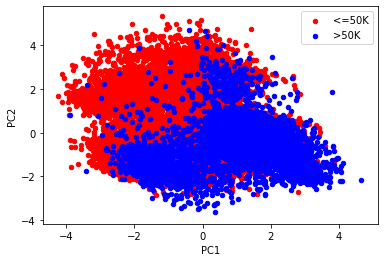

In [12]:
#　the plot to show the relationship between y and PC1&PC2
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df = pd.concat([X_pca_df, pd.DataFrame(adult_df_pca, columns=['income-bracket'])], axis=1)
# ['income-bracket']: 0:<=50K; 1:>50K
pca_less_50 = X_pca_df[X_pca_df['income-bracket']==0]
pca_over_50 = X_pca_df[X_pca_df['income-bracket']==1]

# plot <=50K
ax = pca_less_50.plot.scatter(x='PC1', y='PC2', color='red', label='<=50K')
# plot >50K
pca_over_50.plot.scatter(x='PC1', y='PC2', color='blue', label='>50K', ax=ax)

### 補充：僅使用數字型欄位做PCA分析

In [13]:
num_col = adult_df.describe(include=['number']).columns.tolist()
adult_df_temp = pd.DataFrame(adult_df[num_col])
X_temp = adult_df_temp
y_temp = pd.DataFrame(adult_df_pca, columns=['income-bracket'])
X_temp.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


In [14]:
# standardize
sc_temp = preprocessing.StandardScaler()
X_std_temp = sc_temp.fit_transform(X_temp)

In [15]:
# PCA
# to extract PC1 & PC2
pca_temp = PCA(n_components=2)
# training PCA model by X_std
pca_temp.fit(X_std_temp)
# X_pca=Apply dimensionality reduction to X_std (將數據X_std降維後的數據)
X_pca_temp = pca_temp.transform(X_std_temp)

In [16]:
# the extent that PC1 & PC2 can explain the raw data
pc_df_temp = pd.DataFrame([pca_temp.explained_variance_, pca_temp.explained_variance_ratio_]
                          , columns=['PC1_num', 'PC2_num']
                     , index=['variance(eigan value)', 'variance ratio'])
pc_df_temp

,PC1_num,PC2_num
variance(eigan value),1.333304,1.038746
variance ratio,0.222210,0.173119


In [17]:
# components_: PC1 & PC2之於feature columns的標準化係數
pca_temp.components_
ev_df_temp = pd.DataFrame(pca_temp.components_, columns=adult_df_temp.columns, index=['PC1', 'PC2'])
ev_df_temp

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
PC1,0.419007,-0.210761,0.532070,0.400763,0.252340,0.522138
PC2,-0.245646,0.440544,0.141396,0.594808,-0.606029,0.067209


In [18]:
#　the plot to show the relationship between y and PC1&PC2
X_pca_df_temp = pd.DataFrame(X_pca_temp, columns=['PC1_num', 'PC2_num'])
X_pca_df_temp = pd.concat([X_pca_df_temp, y_temp], axis=1)

# ['income-bracket']: 0:<=50K; 1:>50K
pca_less_50_temp = X_pca_df_temp[X_pca_df_temp['income-bracket']==0]
pca_over_50_temp = X_pca_df_temp[X_pca_df_temp['income-bracket']==1]
X_pca_df_temp


,PC1_num,PC2_num,income-bracket
0,0.805378,-0.104922,0
1,-0.149699,-0.612559,0
2,-0.454349,0.093355,0
3,-0.431198,-0.218544,0
4,-0.183625,1.014078,0
...,...,...,...
30157,-0.349557,0.627910,0
30158,-0.268316,-0.199542,1
30159,0.310824,-0.546460,0
30160,-1.808230,0.221361,0


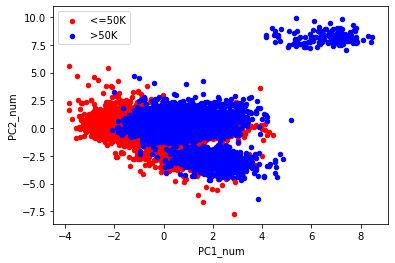

In [19]:
# plot <=50K
ax = pca_less_50_temp.plot.scatter(x='PC1_num', y='PC2_num', color='red', label='<=50K')
# plot >50K
pca_over_50_temp.plot.scatter(x='PC1_num', y='PC2_num', color='blue', label='>50K', ax=ax)